1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
đầu tiên.

In [1]:
import pandas as pd

In [2]:
def load_data(filename):
    return pd.read_csv("titanic_disaster.csv")

In [3]:
filename="D:\khoa.2274802010424\titanic_disaster.csv"
tidisater=load_data(filename)
tidisater.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 2 Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

<bound method DataFrame.count of      PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

      

<AxesSubplot:>

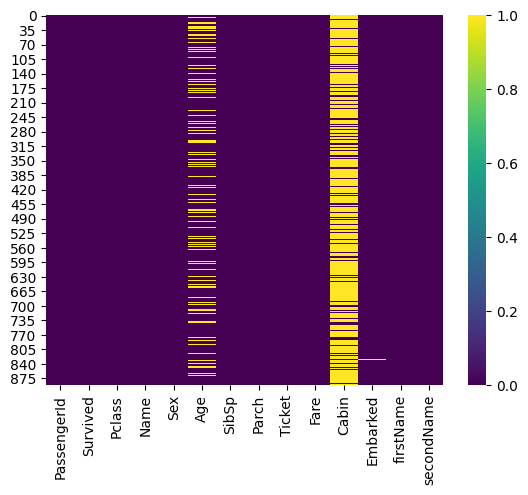

In [11]:
dfage = tidisater[tidisater["Age"].isna()]
print(dfage.count)

dfcarbin=tidisater[tidisater["Cabin"].isna()]
print(dfcarbin.count)

dfembarked=tidisater[tidisater["Embarked"].isna()]
print(dfembarked.count)

import seaborn as sns
sns.heatmap(tidisater.isna(),cmap='viridis')

 3 Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name

In [4]:
tidisater[["firstName","secondName"]]=tidisater["Name"].str.split(',',expand = True)
tidisater_splitname=tidisater.drop("Name",axis=1)
tidisater_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4 Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [8]:
def substitute_Sex(x_df):
    mapping={'male':'M', 'female':'F'}
    x_df['sex']=x_df['Sex'].map(mapping)
    return x_df

In [ ]:
tidisater5=tidisater_splitname.pipe(substitute_Sex)
tidisater5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,sex
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,M
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,F
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),F
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,M


5 a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

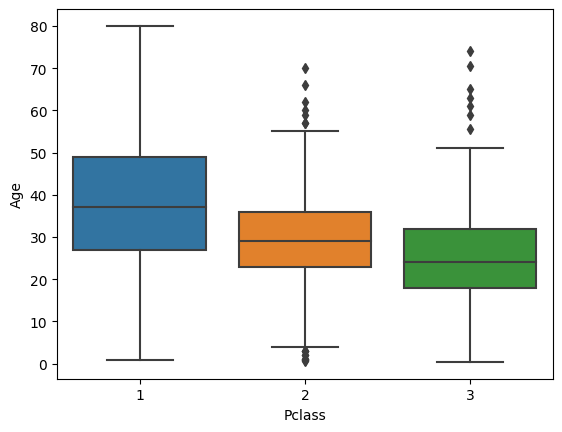

In [14]:
import seaborn as sns
sns.boxplot(y='Age',x='Pclass',data=tidisater5)

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map

In [16]:
tidisater5["Age"][tidisater5["Pclass"]==1]=tidisater5["Age"][tidisater5["Pclass"]==1].fillna(tidisater5["Age"][tidisater5["Pclass"]==1].median(),inplace=False)
tidisater5["Age"][tidisater5["Pclass"]==2]=tidisater5["Age"][tidisater5["Pclass"]==2].fillna(tidisater5["Age"][tidisater5["Pclass"]==2].median(),inplace=False)
tidisater5["Age"][tidisater5["Pclass"]==3]=tidisater5["Age"][tidisater5["Pclass"]==3].fillna(tidisater5["Age"][tidisater5["Pclass"]==3].median(),inplace=False)

C:\Users\US\AppData\Local\Temp\ipykernel_18608\2643384484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidisater5["Age"][tidisater5["Pclass"]==1]=tidisater5["Age"][tidisater5["Pclass"]==1].fillna(tidisater5["Age"][tidisater5["Pclass"]==1].median(),inplace=False)
C:\Users\US\AppData\Local\Temp\ipykernel_18608\2643384484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidisater5["Age"][tidisater5["Pclass"]==2]=tidisater5["Age"][tidisater5["Pclass"]==2].fillna(tidisater5["Age"][tidisater5["Pclass"]==2].median(),inplace=False)
C:\Users\US\AppData\Local\Temp\ipykernel_18608\2643384484.py:3: SettingWithCopyWarning

In [23]:

%matplotlib inLine
%config InlineBackend.figure_format = 'svg'
sns.heatmap(tidisater5.isna(),yticklabels = False , cbar=True, cmap='viridis')

<AxesSubplot:>

Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [26]:
tidisater5.loc[(tidisater5['Age']<=12),'Agegroup']='Kid'
tidisater5.loc[(tidisater5['Age']>12) &(tidisater5['Age']<18),'Agegroup']='Teen'
tidisater5.loc[(tidisater5['Age']>=18) &(tidisater5['Age']<=60),'Agegroup']='Adult'
tidisater5.loc[(tidisater5['Age']>60),'Agegroup']='Older'


In [27]:
tidisater5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,sex,Agegroup
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,M,Adult
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,Adult
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,F,Adult
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,Adult
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,M,Adult


 7 Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [32]:
listNamePrefix = []

for index, row in tidisater5.iterrows():
    # Find the first space
    vitri = row['secondName'].strip().find(' ')
    secondname = row['secondName'].strip()
    # s[bd:kt]: extract a string from the start position to the end position
    # s[bd:]: extract a string from the start position to the end of the string
    namePrefix = secondname[vitri+1:]
    listNamePrefix.append(namePrefix)

cotNamePrefix = pd.DataFrame(listNamePrefix, columns=['namePrefix'])
tidisater5 = pd.concat([tidisater5, cotNamePrefix], axis=1, sort=False)

print(tidisater5)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female  24.0      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  firstName  \
0           A/5 21171   7.2500   NaN        S     Braund   
1            PC 17599  71.2833   C85        C    Cumings   
2    STON/O2. 3101282   7.9